[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

# Import the libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data

In [26]:
df=pd.read_csv("athlete_events.csv")

### Don't forget to drop duplicates first

In [ ]:
df= df.drop_duplicates()
print("Shape of DataFrame after dropping duplicates:", df.shape)

# <font color='red'>**Beginner level**</font>

### Find the missing data in each column

In [ ]:
missing_data= df.isnull().sum()
print('Missing data in each column:')
print(missing_data)

### plot the Number of males and females

In [ ]:
gender_counts = df['Sex'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Number of Males and Females')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### How many cities do we have and what are they ?

In [ ]:
unique_cities = df['City'].unique()
num_cities = len(unique_cities)

# Display the number of cities and the list of cities
print("Number of cities:", num_cities)
print("Cities:")
for city in unique_cities:
    print(city)

# <font color='red'>**Intermediate level**</fond>

### Find the number of athlete for each year and plot them

In [ ]:
athlete_per_year = df.groupby('Year')['ID'].nunique().reset_index()

# Create a plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='ID', data=athlete_per_year, palette='viridis')
plt.title('Number of Athlete for Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Athlete')
plt.xticks(rotation=45)
plt.show()

### Which athlete participated the most? (his/her name and ID)

In [ ]:
most_participated_id = df['ID'].value_counts().idxmax()


most_participated_name = df.loc[df['ID'] == most_participated_id, 'Name'].iloc[0]

print("Most participated athlete:")
print("Name:", most_participated_name)
print("ID:", most_participated_id)

# <font color='red'>**Advanced level**</fond>

### Find the number of each medal for each year.
##### The output should look like this
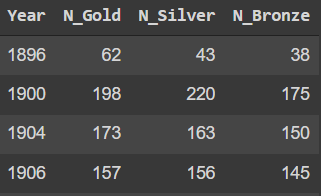

In [ ]:
medal_counts = df.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

styled_table = medal_counts.style.set_table_styles([
    {'selector': 'table', 'props': [('background-color', 'black'), ('color', 'white')]},
    {'selector': 'th', 'props': [('background-color', 'black'), ('color', 'white')]},
    {'selector': 'td', 'props': [('background-color', 'black'), ('color', 'white')]}
])

# Display the styled table
styled_table

# plot the previous table

In [ ]:
medal_counts = df.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 15))
sns.heatmap(medal_counts, cmap='Blues', annot=True, fmt='d')
plt.title('Number of Medals for Each Year')
plt.xlabel('Medal')
plt.ylabel('Year')
plt.show()

# <font color='red'>**You are Geek!**</fond>
### Provide all your answers with plots

### Find the number of winners with the gold medal in each city?

In [ ]:
gold_winners = df[df['Medal'] == 'Gold']

gold_winners_by_city = gold_winners.groupby('City').size().sort_values(ascending=False)
print('Number of winners with gold medal in each city:')
print(gold_winners_by_city)

In [ ]:
# Plot the number of gold medal winners in each city
plt.figure(figsize=(13,10))
gold_winners_by_city.plot(kind='bar', color='gold')
plt.title('Number of Gold Medal Winners in Each City')
plt.xlabel('City')
plt.ylabel('Number of Gold Medal Winners')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Find the total missing data for each year?

In [ ]:
# Sum the missing values for each column
missing_data_per_year = df.groupby('Year').apply(lambda x: x.isnull().sum())

# Display the total missing data for each year
print("Total missing data for each year:")
print(missing_data_per_year)

In [ ]:
plt.figure(figsize=(30, 24))
missing_data_per_year.plot(kind='bar', color='green')
plt.title('Total Missing data per year')
plt.xlabel('Year')
plt.ylabel('Total Missind data')
plt.xticks(rotation=100, ha='right')
plt.tight_layout()
plt.show()

# <font color='red'>**I dare you to solve this :)**</fond>
### Dont use for loops, and provide all your answers with plots.

### Has the number of athletes changed over time for Summer and Winter?

<Figure size 1000x600 with 0 Axes>

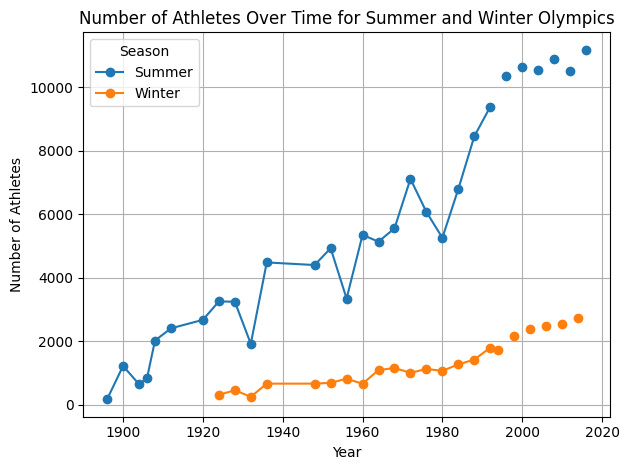

In [67]:
athlete_counts = df.groupby(['Year', 'Season'])['ID'].nunique().unstack()

# Plot the number of athletes over time for Summer and Winter Olympics
plt.figure(figsize=(10, 6))
athlete_counts.plot(marker='o')
plt.title('Number of Athletes Over Time for Summer and Winter Olympics')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend(title='Season', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#<font color='red'> **Bouns Questions</fond>**

### How has the participation of male vs. female athletes changed over the years? (You can use a line plot)

In [ ]:
# Group the data by year and season, and count the number of unique athletes in each group
athlete_counts = df.groupby(['Year', 'Sex'])['ID'].nunique().unstack()

# Plot the number of male and female Athletes over the year
plt.figure(figsize=(20, 10))
athlete_counts.plot(marker='o')
plt.title('participation of male vs. female athletes over the years')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend(title='Sex', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### What is the distribution of ages of athletes? Are there any differences in age distributions between medal winners and non-medal winners? (You can use histograms or KDE plots.)

In [ ]:
unique_athletes = df.drop_duplicates(subset='ID')

# Plot the distribution of ages for all athletes
plt.figure(figsize=(20, 12))
sns.histplot(data=unique_athletes, x='Age', kde=True, color='skyblue', bins=30)
plt.title('Distribution of Ages of Athletes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the distribution of ages for medal winners and non-medal winners
plt.figure(figsize=(20, 12))
sns.histplot(data=df, x='Age', hue='Medal', kde=True, palette='muted', bins=30, multiple='stack')
plt.title('Distribution of Ages of Athletes by Medal Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Medal', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Which countries have won the most medals in the last 30 years?

In [ ]:
last_30_years = df[df['Year'] >= df['Year'].max() - 30]

# Group the data by NOC and Medal, and count the occurrences
medal_counts = last_30_years.groupby(['NOC', 'Medal']).size().unstack(fill_value=0)

# Sum the total number of medals for each country
total_medals = medal_counts.sum(axis=1)

# Find the countries that have won the most medals
most_medals_countries = total_medals.nlargest(10)

print("Countries with the most medals in the last 30 years:")
print(most_medals_countries)

### Which sports have the highest number of participants in the Summer Olympics vs. the Winter Olympics?

### Is there a relationship between an athlete's height and weight across different sports? (You can use a scatter plot with height on the x-axis and weight on the y-axis, possibly color-coded by sport or medal status.)